In [0]:
import keras
keras.__version__

'2.2.5'

In [0]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers


In [0]:


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:
print('Training data')
print('Shape of train_images:' ,train_images.shape)
print('Shape of train_labels:' ,train_labels.shape)
print('Shape of test_images:' ,test_images.shape)
print('Shape of test_labels:', test_labels.shape)


Training data
Shape of train_images: (50000, 32, 32, 3)
Shape of train_labels: (50000, 1)
Shape of test_images: (10000, 32, 32, 3)
Shape of test_labels: (10000, 1)


In [0]:

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:

from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras import regularizers 

REG = 0.00001
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(REG),activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(REG)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(REG)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(REG)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(REG)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(REG)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
 


In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)       

In [0]:


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
from keras.callbacks import Callback, ModelCheckpoint

checkpoint = ModelCheckpoint(
    '/content/cipher_bestrun.h5', 
    monitor='val_acc', 
    verbose=0, 
    save_best_only=True, 
    save_weights_only=False
    
)

In [0]:
history = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_split=0.2, callbacks=[checkpoint])

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 9s 223us/step - loss: 0.4760 - acc: 0.8349 - val_loss: 0.5811 - val_acc: 0.8088
Epoch 2/50
40000/40000 [==============================] - 8s 204us/step - loss: 0.4647 - acc: 0.8383 - val_loss: 0.5799 - val_acc: 0.8081
Epoch 3/50
40000/40000 [==============================] - 8s 202us/step - loss: 0.4578 - acc: 0.8406 - val_loss: 0.5655 - val_acc: 0.8090
Epoch 4/50
40000/40000 [==============================] - 8s 203us/step - loss: 0.4479 - acc: 0.8442 - val_loss: 0.5656 - val_acc: 0.8123
Epoch 5/50
40000/40000 [==============================] - 8s 201us/step - loss: 0.4309 - acc: 0.8491 - val_loss: 0.5537 - val_acc: 0.8158
Epoch 6/50
40000/40000 [==============================] - 8s 201us/step - loss: 0.4247 - acc: 0.8518 - val_loss: 0.5608 - val_acc: 0.8132
Epoch 7/50
40000/40000 [==============================] - 8s 212us/step - loss: 0.4209 - acc: 0.8510 - val_loss: 0.5929 - 

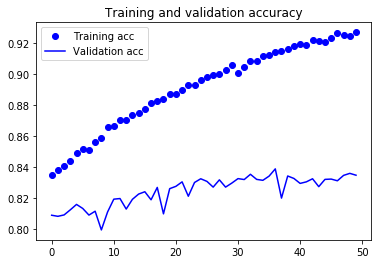

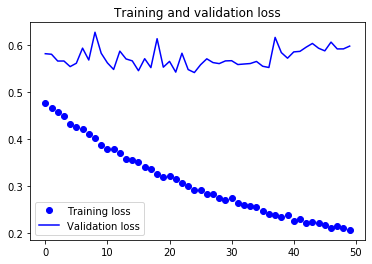

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
 model = keras.models.load_model('/content/cipher_bestrun.h5')


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 173us/step


In [0]:
test_acc

0.836

In [0]:
test_loss

0.5657091959714889

In [0]:
import numpy as np
yActualVal=np.argmax(test_labels,axis=1)
yActualVal


array([3, 8, 8, ..., 5, 1, 7])

In [0]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

yPredictedVal = model.predict_classes(test_images)
yPredictedVal


array([3, 8, 8, ..., 5, 1, 7])

In [0]:
print(classification_report(y_true=yActualVal, y_pred=yPredictedVal))


              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1000
           1       0.93      0.89      0.91      1000
           2       0.78      0.76      0.77      1000
           3       0.73      0.67      0.70      1000
           4       0.81      0.84      0.82      1000
           5       0.77      0.75      0.76      1000
           6       0.85      0.90      0.87      1000
           7       0.87      0.87      0.87      1000
           8       0.90      0.92      0.91      1000
           9       0.87      0.92      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.84     10000
weighted avg       0.83      0.84      0.84     10000



In [0]:
print(confusion_matrix(y_true=yActualVal, y_pred=yPredictedVal))


[[847  14  35   8  13   3   7   8  43  22]
 [ 10 894   3   2   2   3   2   2  13  69]
 [ 43   1 759  26  53  37  49  18   8   6]
 [ 10   3  53 671  47 124  43  25  12  12]
 [ 12   2  38  27 841  12  33  26   6   3]
 [ 10   0  27 124  34 746  15  35   3   6]
 [  5   2  29  36  14   6 898   6   3   1]
 [  6   1  27  20  32  34   8 866   2   4]
 [ 29  16   5   5   4   2   3   2 915  19]
 [ 16  27   3   4   3   2   2   3  17 923]]
